In [6]:
import platform
if platform.system() == 'Linux':
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'
else:
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'
p, g = symbols('p \gamma', real = True, positive=True)

## __One-qubit__ decoherence channels

### Bit flip channel
Kraus operators
\begin{equation} K_{0}^{bf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{bf}=\sqrt{p}\sigma_{1}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{bf}(p)=\left(r_{1},r_{2}(1-2p),r_{3}(1-2p)\right).\end{equation}

In [2]:
def Kbf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(1)
def BFC(rho, p):
    return Kbf(0, p)*rho*Kbf(0, p) + Kbf(1, p)*rho*Kbf(1, p)

### Phase flip channel
Kraus operators
\begin{equation} K_{0}^{pf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{pf}=\sqrt{p}\sigma_{3}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{pf}(p)=\left(r_{1}(1-2p),r_{2}(1-2p),r_{3}\right).\end{equation}

In [4]:
def Kpf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(3)
def PFC(rho, p):
    return Kpf(0, p)*rho*Kpf(0, p) + Kpf(1, p)*rho*Kpf(1, p)

### Bit-phase flip channel
Kraus operators
\begin{equation} K_{0}^{bpf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{bpf}=\sqrt{p}\sigma_{2}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{bpf}(p)=\left(r_{1}(1-2p),r_{2},r_{3}(1-2p)\right).\end{equation}

In [5]:
def Kbpf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(2)
def BPFC(rho, p):
    return Kbpf(0, p)*rho*Kbpf(0, p) + Kbpf(1, p)*rho*Kbpf(1, p)

### Depolarizing channel
Kraus operators
\begin{equation} K_{0}^{d}=\sqrt{1-3p/4}\sigma_{0}\text{, }K_{1}^{d}=\sqrt{p/4}\sigma_{1}\text{, }K_{2}^{d}=\sqrt{p/4}\sigma_{2}\text{, }K_{3}^{d}=\sqrt{p/4}\sigma_{3}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{d}(p)=\left(r_{1}(1-p),r_{2}(1-p),r_{3}(1-p)\right).\end{equation}

In [6]:
def Kd(j, p):
    if j == 0:
        return sqrt(1-3*p/4)*Pauli(0)
    elif j == 1:
        return sqrt(p/4)*Pauli(1)
    elif j == 2:
        return sqrt(p/4)*Pauli(2)
    elif j == 3:
        return sqrt(p/4)*Pauli(3)
def DC(rho, p):
    return Kd(0, p)*rho*Kd(0, p) + Kd(1, p)*rho*Kd(1, p) + Kd(2, p)*rho*Kd(2, p) + Kd(3, p)*rho*Kd(3, p)

### Amplitude damping channel
Kraus operators
\begin{equation}K_{0}^{ad} = \begin{bmatrix} 0 & \sqrt{\gamma} \\ 0 & 0 \end{bmatrix}\text{, } K_{1}^{ad} = \begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-\gamma} \end{bmatrix}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{ad}(\gamma)=\left(r_{1}\sqrt{1-\gamma},r_{2}\sqrt{1-\gamma},r_{3}(1-\gamma)+\gamma\right).\end{equation}

In [7]:
def Kad(j, g):
    if j == 0:
        return Matrix([[0,sqrt(g)],[0,0]])
    elif j == 1:
        return Matrix([[1,0],[0,sqrt(1-g)]])
def ADC(rho, g):
    return Kad(0, g)*rho*(Kad(0, g).T) + Kad(1, g)*rho*Kad(1, g)

### Generalized amplitude damping channel
Kraus operators
\begin{equation}K_{0}^{gad} = \sqrt{p}\begin{bmatrix} 0 & \sqrt{\gamma} \\ 0 & 0 \end{bmatrix}\text{, } K_{1}^{gad} = \sqrt{p}\begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-\gamma} \end{bmatrix}\text{, }K_{2}^{gad} = \sqrt{1-p}\begin{bmatrix} 0 & 0 \\ \sqrt{\gamma} & 0 \end{bmatrix}\text{, } K_{3}^{gad} = \sqrt{1-p}\begin{bmatrix} \sqrt{1-\gamma} & 0 \\ 0 & 1 \end{bmatrix}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{gad}(\gamma)=\left(r_{1}\sqrt{1-\gamma},r_{2}\sqrt{1-\gamma},r_{3}(1-\gamma)+\gamma(2p-1)\right).\end{equation}

In [8]:
def Kgad(j, g, p):
    if j == 0:
        return sqrt(p)*Matrix([[0,sqrt(g)],[0,0]])
    elif j == 1:
        return sqrt(p)*Matrix([[1,0],[0,sqrt(1-g)]])
    elif j == 2:
        return sqrt(1-p)*Matrix([[0,0],[sqrt(g),0]])
    elif j == 3:
        return sqrt(1-p)*Matrix([[sqrt(1-g),0],[0,1]])
def GADC(rho, g, p):
    return Kgad(0, g, p)*rho*(Kgad(0, g, p).T) + Kgad(1, g, p)*rho*Kgad(1, g, p) \
           + Kgad(2, g, p)*rho*(Kgad(2, g, p).T) + Kgad(3, g, p)*rho*Kgad(3, g, p)

### Phase damping channel
Kraus operators
\begin{equation}K_{0}^{pd} = \begin{bmatrix}1&0\\0&\sqrt{1-\gamma}\end{bmatrix}\text{, } K_{1}^{pd} = \begin{bmatrix}0&0\\0&\sqrt{\gamma}\end{bmatrix}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{pd}(\gamma)=\left(r_{1}(1-\gamma),r_{2}(1-\gamma),r_{3}\right).\end{equation}

In [9]:
def Kpd(j, g):
    if j == 0:
        return Matrix([[1,0],[0,sqrt(1-g)]])
    elif j == 1:
        return Matrix([[0,0],[0,sqrt(g)]])
def PDC(rho, g):
    return Kpd(0, g)*rho*Kpd(0, g) + Kpd(1, g)*rho*Kpd(1, g)

### Composition of phase damping with generalized amplitude damping


In [20]:
def Kpdgad(j,p,g,h):
    if j == 0:
        return  Kgad(0, g, p)*Kpd(0,h)
    elif j == 1:
        return  Kgad(0, g, p)*Kpd(1,h)
    elif j == 2:
        return  Kgad(1, g, p)*Kpd(0,h)
    elif j == 3:
        return  Kgad(1, g, p)*Kpd(1,h)
    elif j == 4:
        return  Kgad(2, g, p)*Kpd(0,h)
    elif j == 5:
        return  Kgad(2, g, p)*Kpd(1,h)
    elif j == 6:
        return  Kgad(3, g, p)*Kpd(0,h)
    elif j == 7:
        return  Kgad(3, g, p)*Kpd(1,h)

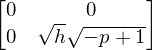

In [18]:
p, g, h = symbols('p g h')
Kpdgad(7,p,g,h)

In [ ]:
pa, ga, ha, pb, gb, hb = symbols('p_{a} g_{a} h_{a} p_{b} g_{b} h_{b}', real=True, positive=True)
def Kpdgad_ab(rho,pa,ga,ha,pb,gb,hb):
    rhot = zeros(4,4)
    mat = zeros(4,4)
    for j in range(0,8):
        for k in range(0,8):
            mat = tp(Kpdgad(j,pa,ga,ha),Kpdgad(k,pb,gb,hb))
            rhot += mat*rho*Dagger(mat)
    return rhot

## __Two-qubit__ decoherence channels

In [ ]:
def PDC(rho, g):
    return Kpd(0, g)*rho*Kpd(0, g) + Kpd(1, g)*rho*Kpd(1, g) + Kpd(2, g)*rho*Kpd(2, g)